In [1]:
import pandas as pd
import datetime
import seaborn as sns

# Covid Cases Data

In [2]:
# Read in the data
df = pd.read_csv('data/covid_prison_cases.csv')
df['date'] = pd.to_datetime(df['as_of_date'])
df['week_num'] = df['date'].apply(lambda x: str(x.year)+"-"+str(datetime.date(x.year, x.month, x.day).isocalendar()[1]))
df = df.drop(['as_of_date', 'notes'], 1)
print(df.shape)
df.head()

(357, 10)


,name,abbreviation,staff_tests,prisoner_tests,total_staff_cases,total_prisoner_cases,total_staff_deaths,total_prisoner_deaths,date,week_num
0,Alabama,AL,NaN,102.0,17.0,8.0,0.0,1.0,2020-05-06,2020-19
1,Alaska,AK,NaN,235.0,8.0,1.0,0.0,0.0,2020-05-06,2020-19
2,Arizona,AZ,NaN,277.0,52.0,69.0,0.0,5.0,2020-05-06,2020-19
3,Arkansas,AR,NaN,NaN,127.0,944.0,0.0,5.0,2020-05-07,2020-19
4,California,CA,NaN,1551.0,169.0,398.0,0.0,1.0,2020-05-06,2020-19


We see that most test data is not available.

In [3]:
df.isna().sum()

name                       0
abbreviation               0
staff_tests              309
prisoner_tests           136
total_staff_cases         51
total_prisoner_cases       9
total_staff_deaths        33
total_prisoner_deaths     10
date                       0
week_num                   0
dtype: int64

In [4]:
print("Number of unique states (including Federal Bureau of Prisons):", df['name'].nunique())
print("Number of unique dates:", df['date'].nunique())
print("Number of unique weeks:", df['week_num'].nunique())

Number of unique states (including Federal Bureau of Prisons): 51
Number of unique dates: 31
Number of unique weeks: 7


In [5]:
for state in df['abbreviation'].unique():
    state_df = df[df['abbreviation'] == state].copy()
    state_df = state_df.sort_values('week_num').reset_index(drop=1)
    state_df.to_csv(f'clean_data/{state}.csv', index=None)

In [6]:
# Example state_df
state_df

,name,abbreviation,staff_tests,prisoner_tests,total_staff_cases,total_prisoner_cases,total_staff_deaths,total_prisoner_deaths,date,week_num
0,Federal,US,NaN,NaN,8.0,10.0,0.0,0.0,2020-03-26,2020-13
1,Federal,US,NaN,NaN,37.0,60.0,0.0,3.0,2020-04-01,2020-14
2,Federal,US,NaN,NaN,92.0,275.0,0.0,8.0,2020-04-08,2020-15
3,Federal,US,NaN,NaN,280.0,468.0,0.0,16.0,2020-04-15,2020-16
4,Federal,US,NaN,NaN,342.0,590.0,0.0,24.0,2020-04-22,2020-17
5,Federal,US,NaN,NaN,475.0,1979.0,0.0,31.0,2020-04-29,2020-18
6,Federal,US,NaN,NaN,514.0,2701.0,0.0,42.0,2020-05-06,2020-19


In [7]:
df = df.sort_values(['name', 'week_num']).reset_index(drop=1)
df.to_csv('clean_data/covid_prison_cases.csv', index=None)

# Prison Populations Data

In [8]:
prison = pd.read_csv('data/prison_populations.csv')
prison.columns = ['name', 'abbreviation', 'prison_pop', 'prison_pop_date']
print(prison.shape)
prison.head()

(51, 4)


,name,abbreviation,prison_pop,prison_pop_date
0,Alabama,AL,21154,1/31/2020
1,Alaska,AK,4997,12/31/2019
2,Arizona,AZ,41674,4/15/2020
3,Arkansas,AR,18181,2/29/2020
4,California,CA,118466,4/15/2020


In [9]:
staff = pd.read_csv('data/staff_populations.csv').drop(['notes', 'abbreviation'], 1)
staff.columns = ['name', 'staff_pop', 'staff_pop_date']
print(staff.shape)
staff.head()

(51, 3)


,name,staff_pop,staff_pop_date
0,Alabama,6259.0,9/30/2019
1,Alaska,NaN,NaN
2,Arizona,8536.0,10/31/2019
3,Arkansas,4045.0,2/29/2020
4,California,46000.0,4/15/2020


We will combine these two datasets together.

In [10]:
pop = pd.merge(prison, staff, on = 'name', how = 'inner')
print(pop.shape)
pop.head()

(51, 6)


,name,abbreviation,prison_pop,prison_pop_date,staff_pop,staff_pop_date
0,Alabama,AL,21154,1/31/2020,6259.0,9/30/2019
1,Alaska,AK,4997,12/31/2019,NaN,NaN
2,Arizona,AZ,41674,4/15/2020,8536.0,10/31/2019
3,Arkansas,AR,18181,2/29/2020,4045.0,2/29/2020
4,California,CA,118466,4/15/2020,46000.0,4/15/2020


In [11]:
# Inspect NaN
pop.isna().sum()

name               0
abbreviation       0
prison_pop         0
prison_pop_date    0
staff_pop          6
staff_pop_date     6
dtype: int64

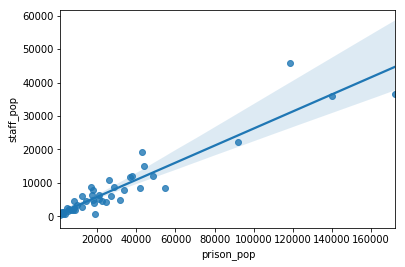

In [12]:
# Relationship between prison and staff population
sns.regplot(pop['prison_pop'], pop['staff_pop'])

In [13]:
# Print the states with NaN staff_pop
pop[pop['staff_pop'].isna()]

,name,abbreviation,prison_pop,prison_pop_date,staff_pop,staff_pop_date
1,Alaska,AK,4997,12/31/2019,NaN,NaN
10,Hawaii,HI,4631,3/31/2020,NaN,NaN
16,Kentucky,KY,11782,4/15/2020,NaN,NaN
19,Maryland,MD,18800,12/31/2019,NaN,NaN
25,Montana,MT,17355,6/30/2018,NaN,NaN
43,Utah,UT,6131,4/21/2020,NaN,NaN


In [14]:
pop.to_csv('clean_data/population.csv', index=None)